# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

## Intro to the Dataset

**Dataset**: African Malaria Synthetic Dataset – baseline sample (1,000 observations)
**Objective**: Apply PCA from scratch to identify main patterns in malaria-related features in Sub-Saharan Africa

**Context**: This synthetic dataset simulates demographic, clinical, and epidemiological features relevant to malaria, including age, sex, residence, fever, parasitemia, anemia, and severe outcomes. It contains numeric, categorical, and boolean variables, with some missing values, making it ideal for preprocessing, dimensionality reduction, and PCA analysis.

Relevance: Malaria is a major health concern in Sub-Saharan Africa. Using this dataset allows exploration of feature correlations, risk patterns, and data-driven insights in an African context.

In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

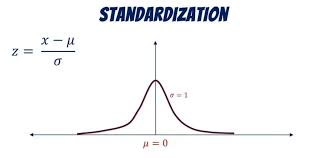


In [3]:
import pandas as pd
import numpy as np

# Load the African Malaria synthetic dataset (baseline)
url = "https://huggingface.co/datasets/electricsheepafrica/african-malaria-dataset/resolve/main/malaria_ssa_baseline_1000.csv"
df = pd.read_csv(url)

# Check first rows
df.head()


,patient_id,age_years,age_months,age_group,sex,residence,season,uses_mosquito_net,malaria_status,parasitemia_level,...,has_vomiting,has_diarrhea,has_weakness,severe_malaria,cerebral_malaria,respiratory_distress,shock,acute_kidney_injury,outcome,malaria_probability_score
0,MAL000001,6,76.0,6-12,Male,Rural,Dry,False,Negative,NaN,...,False,False,False,False,False,False,False,False,Healthy,0.437
1,MAL000002,0,10.0,0-2,Male,Rural,Dry,False,Positive,Moderate,...,False,False,True,False,False,False,False,False,Treated,0.546
2,MAL000003,17,210.0,12+,Female,Rural,Dry,True,Negative,NaN,...,False,False,False,False,False,False,False,False,Healthy,0.182
3,MAL000004,4,52.0,2-6,Female,Rural,Rainy,True,Positive,High,...,True,True,False,False,False,False,False,False,Treated,0.546
4,MAL000005,2,34.0,2-6,Female,Rural,Rainy,True,Negative,NaN,...,False,False,False,False,False,False,False,False,Healthy,0.546


In [4]:
# Step 3: Inspect and clean data

print("\nDataFrame info:")
df.info()

print("\nMissing values per column (top 20):")
display(df.isna().sum().sort_values(ascending=False).head(20))

display(df.describe(include='all').T.head(10))

# Identify and handle non-numeric columns
non_numeric = df.select_dtypes(exclude=[np.number])
print(f"\nNon-numeric columns ({non_numeric.shape[1]}):", list(non_numeric.columns))
display(non_numeric.head())

# Handle non-numeric columns:
encoded_df = df.copy()
for c in non_numeric.columns:
    n_unique = df[c].nunique(dropna=False)
    if n_unique <= 20:
        dummies = pd.get_dummies(df[c].astype('category'), prefix=c, dummy_na=True)
        encoded_df = pd.concat([encoded_df.drop(columns=[c]), dummies], axis=1)
    else:
        encoded_df[c] = df[c].astype('category').cat.codes

print("After encoding non-numeric columns:", encoded_df.shape)

# Keep numeric columns only
numeric_df = encoded_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

# Fill NaN with mean of each column
numeric_df = numeric_df.fillna(numeric_df.mean())

# Remove constant columns (0 std, population definition for consistency)
numeric_df = numeric_df.loc[:, numeric_df.std(ddof=0) != 0]

print("\nCheck for remaining NaNs:", numeric_df.isna().sum().sum())
print("Numeric features kept:", numeric_df.shape[1])
display(numeric_df.head())



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 1000 non-null   object 
 1   age_years                  1000 non-null   int64  
 2   age_months                 1000 non-null   float64
 3   age_group                  1000 non-null   object 
 4   sex                        1000 non-null   object 
 5   residence                  1000 non-null   object 
 6   season                     1000 non-null   object 
 7   uses_mosquito_net          1000 non-null   bool   
 8   malaria_status             1000 non-null   object 
 9   parasitemia_level          531 non-null    object 
 10  parasitemia_count          1000 non-null   int64  
 11  plasmodium_species         531 non-null    object 
 12  hemoglobin_g_dl            1000 non-null   float64
 13  anemia_status              210 n

,0
anemia_status,790
parasitemia_level,469
plasmodium_species,469
patient_id,0
age_group,0
age_months,0
sex,0
residence,0
uses_mosquito_net,0
season,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,1000,1000,MAL001000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_years,1000.0,NaN,NaN,NaN,11.106,9.98842,0.0,6.0,7.0,14.0,65.0
age_months,1000.0,NaN,NaN,NaN,137.819,120.610344,4.0,72.0,87.0,178.0,781.0
age_group,1000,4,6-12,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1000,2,Male,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residence,1000,2,Rural,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,2,Rainy,613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uses_mosquito_net,1000,2,False,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malaria_status,1000,2,Positive,531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parasitemia_level,531,3,Moderate,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Non-numeric columns (22): ['patient_id', 'age_group', 'sex', 'residence', 'season', 'uses_mosquito_net', 'malaria_status', 'parasitemia_level', 'plasmodium_species', 'anemia_status', 'has_fever', 'has_chills', 'has_headache', 'has_vomiting', 'has_diarrhea', 'has_weakness', 'severe_malaria', 'cerebral_malaria', 'respiratory_distress', 'shock', 'acute_kidney_injury', 'outcome']


,patient_id,age_group,sex,residence,season,uses_mosquito_net,malaria_status,parasitemia_level,plasmodium_species,anemia_status,...,has_headache,has_vomiting,has_diarrhea,has_weakness,severe_malaria,cerebral_malaria,respiratory_distress,shock,acute_kidney_injury,outcome
0,MAL000001,6-12,Male,Rural,Dry,False,Negative,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Healthy
1,MAL000002,0-2,Male,Rural,Dry,False,Positive,Moderate,P. vivax,Moderate,...,False,False,False,True,False,False,False,False,False,Treated
2,MAL000003,12+,Female,Rural,Dry,True,Negative,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Healthy
3,MAL000004,2-6,Female,Rural,Rainy,True,Positive,High,P. falciparum,Moderate,...,True,True,True,False,False,False,False,False,False,Treated
4,MAL000005,2-6,Female,Rural,Rainy,True,Negative,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Healthy


After encoding non-numeric columns: (1000, 76)

Check for remaining NaNs: 0
Numeric features kept: 7


,patient_id,age_years,age_months,parasitemia_count,hemoglobin_g_dl,fever_days,malaria_probability_score
0,0,6,76.0,0,10.6,0,0.437
1,1,0,10.0,31497,7.6,3,0.546
2,2,17,210.0,0,14.9,0,0.182
3,3,4,52.0,148138,7.9,4,0.546
4,4,2,34.0,0,10.6,0,0.546


In [5]:
# Statistical summary
print("\nStatistical Summary:")
df.describe().T


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age_years,1000.0,11.106000,9.988420,0.000,6.000,7.000,14.000,65.00
age_months,1000.0,137.819000,120.610344,4.000,72.000,87.000,178.000,781.00
parasitemia_count,1000.0,19570.734000,41635.863163,0.000,0.000,1093.000,24180.250,276532.00
hemoglobin_g_dl,1000.0,11.565300,1.968711,6.100,10.200,11.600,12.900,17.10
fever_days,1000.0,1.845000,2.185807,0.000,0.000,1.000,4.000,9.00
malaria_probability_score,1000.0,0.522427,0.243181,0.098,0.364,0.437,0.728,0.95



## Step 2: Data Preprocessing and Cleaning



Found 1 highly correlated feature pairs (|r| > 0.7)

Top 5 correlations:
  age_years ↔ age_months: r = 0.999


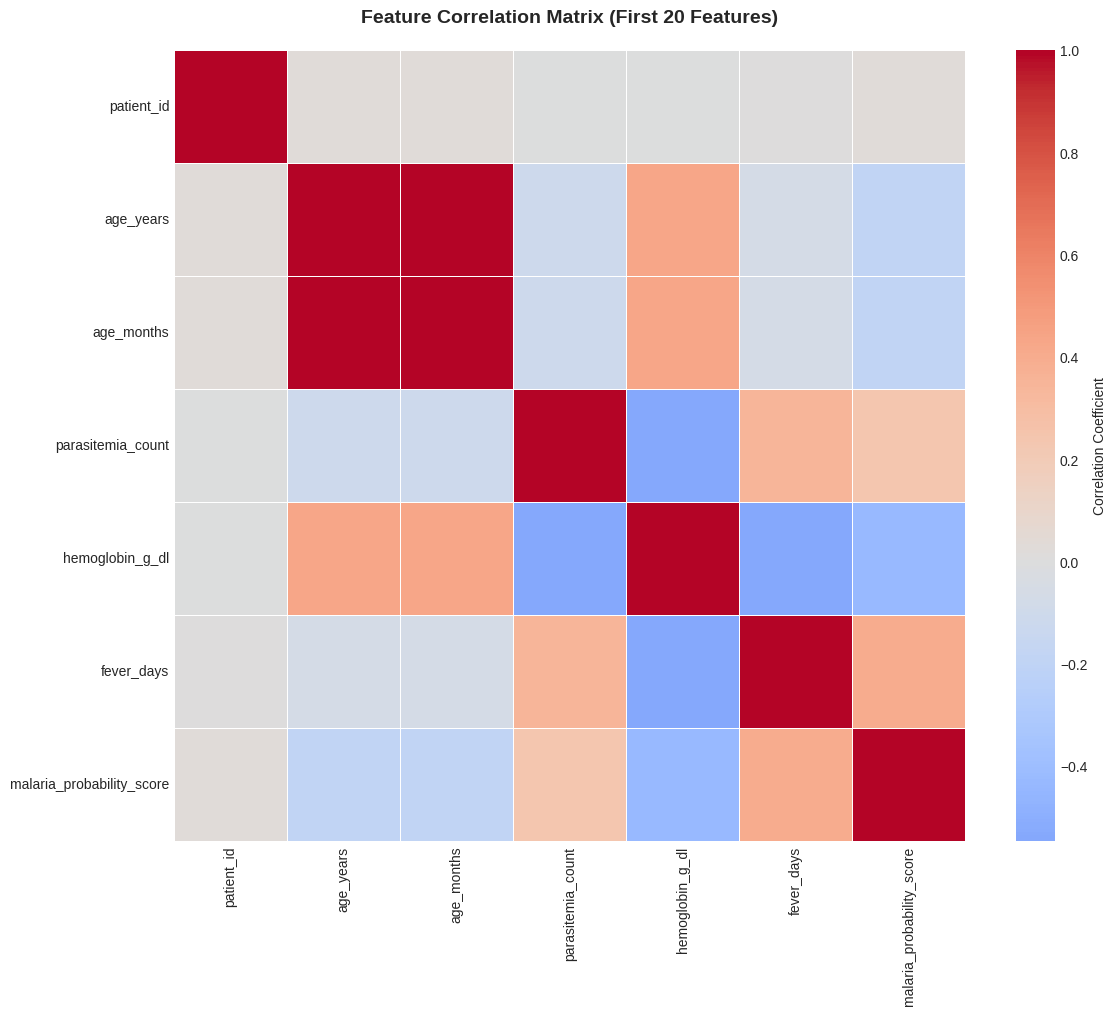


My Interpretation:
High correlations indicate redundant information across features.
PCA will combine these correlated features into uncorrelated principal components,
reducing multicollinearity and revealing underlying patterns in the risk factors.


In [6]:
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7)")
if len(high_corr_pairs) > 0:
    print("\nTop 5 correlations:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]:
        print(f"  {feat1} ↔ {feat2}: r = {corr:.3f}")

# Visualize correlation heatmap (top features)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:20, :20],
            cmap='coolwarm',
            center=0,
            annot=False,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix (First 20 Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nMy Interpretation:")
print("High correlations indicate redundant information across features.")
print("PCA will combine these correlated features into uncorrelated principal components,")
print("reducing multicollinearity and revealing underlying patterns in the risk factors.")

## Step 4: Standardization (Z-Score Normalization)

### Why Standardization?
PCA is sensitive to feature scales. Features with larger ranges would dominate the principal components if not standardized. We transform all features to have:
- **Mean (μ) = 0**
- **Standard Deviation (σ) = 1**

### Formula:
$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = original value
- $\mu$ = mean of feature
- $\sigma$ = standard deviation (using sample std with ddof=1)

In [7]:
# Convert to numpy array
X = numeric_df.values  # Shape: (n_samples, n_features)
feature_names = numeric_df.columns.tolist()

print(f"Data matrix shape: {X.shape}")
print(f"Number of samples (patients): {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Standardization implementation
means = np.mean(X, axis=0)
stds = np.std(X, axis=0, ddof=1)  # Sample standard deviation

# Prevent division by zero (for constant features, though we removed them)
stds_fixed = stds.copy()
stds_fixed[stds_fixed == 0] = 1.0

# Apply standardization
standardized_data = (X - means) / stds_fixed

# Verification
print("\nVerification after standardization:")
print(f"  Mean of first feature: {np.mean(standardized_data[:, 0]):.10f} (should be ~0)")
print(f"  Std of first feature: {np.std(standardized_data[:, 0], ddof=1):.10f} (should be ~1)")
print(f"  Any NaN values: {np.isnan(standardized_data).any()}")
print(f"  Any Inf values: {np.isinf(standardized_data).any()}")

# Display first few rows
print("\nFirst 3 patients (standardized):")
standardized_data[:3, :5]  # Show first 5 features

Data matrix shape: (1000, 7)
Number of samples (patients): 1000
Number of features: 7

Verification after standardization:
  Mean of first feature: -0.0000000000 (should be ~0)
  Std of first feature: 1.0000000000 (should be ~1)
  Any NaN values: False
  Any Inf values: False

First 3 patients (standardized):


array([[-1.72945425, -0.51119196, -0.51255139, -0.47004511, -0.4903209 ],
       [-1.72599187, -1.11188757, -1.05976814,  0.28644215, -2.01416086],
       [-1.7225295 ,  0.59008332,  0.59846442, -0.47004511,  1.6938497 ]])

### Step 5: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

 - **Diagonal elements:** Variance of each feature
- **Off-diagonal elements:** Covariance between feature pairs

### Formula:
$$
\text{Cov}(X) = \frac{1}{n-1} X^T X
$$

Where $X$ is the standardized data matrix.-


In [8]:
# Calculate covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"This is a {cov_matrix.shape[0]}×{cov_matrix.shape[1]} symmetric matrix")



# Display portion of covariance matrix
print("\nFirst 5×5 block of covariance matrix:")
pd.DataFrame(cov_matrix[:5, :5],
             columns=feature_names[:5],
             index=feature_names[:5]).round(3)

Covariance matrix shape: (7, 7)
This is a 7×7 symmetric matrix

First 5×5 block of covariance matrix:


,patient_id,age_years,age_months,parasitemia_count,hemoglobin_g_dl
patient_id,1.000,0.031,0.030,-0.005,0.001
age_years,0.031,1.000,0.999,-0.115,0.430
age_months,0.030,0.999,1.000,-0.115,0.430
parasitemia_count,-0.005,-0.115,-0.115,1.000,-0.547
hemoglobin_g_dl,0.001,0.430,0.430,-0.547,1.000


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

### The Math behind it

For covariance matrix $C$:
$$
C \mathbf{v} = \lambda \mathbf{v}
$$

Where:
- $\mathbf{v}$ = eigenvector (direction of principal component)
- $\lambda$ = eigenvalue (variance explained by that component)




In [9]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.75990096e+00, 1.59606178e+00, 9.99553702e-01, 7.78479939e-01,
        5.67145524e-01, 2.98337968e-01, 5.20126175e-04]),
 array([[-1.07408043e-02, -6.54389042e-02, -9.92881561e-01,
          9.59302440e-02, -2.23456535e-02,  9.29957315e-03,
          4.10576265e-04],
        [-4.51024480e-01, -5.18117790e-01,  3.62265295e-02,
         -6.53734635e-04,  4.25969018e-02, -1.58710178e-01,
         -7.06975720e-01],
        [-4.51233324e-01, -5.17801028e-01,  3.67567920e-02,
         -7.16744191e-04,  4.44911973e-02, -1.57343945e-01,
          7.07235762e-01],
        [ 3.28842075e-01, -3.62773033e-01,  7.98471697e-02,
          6.72536991e-01,  4.00181056e-01,  3.76073891e-01,
         -7.69502805e-04],
        [-5.07840829e-01,  2.00409150e-01, -1.74720902e-02,
         -1.57119552e-01,  9.89309836e-02,  8.16794719e-01,
         -1.04193283e-03],
        [ 3.33008232e-01, -4.59771448e-01,  2.69453206e-02,
         -1.98222352e-01, -7.08641858e-01,  3.68135533e-01,
          7.267

## Significance of Eigenvalues and Eigenvectors
- Eigenvalues indicate the amount of variance captured by each principal component. Larger eigenvalues correspond to directions in the data with more variability.
- Eigenvectors define the directions (axes) along which the data is projected. Each eigenvector is a principal component.
- By sorting eigenvalues in descending order, we prioritize components that retain the most information.
- Selecting the top principal components based on explained variance allows us to reduce dimensionality while preserving key patterns in the data.




### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [10]:
# Step 5: Sort Principal Components
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Principal Components Ranked by Explained Variance:\n")
print(f"{'PC':<5} {'Eigenvalue':<12} {'Variance %':<12} {'Cumulative %':<15}")

for i in range(min(10, len(sorted_eigenvalues))):
    print(f"PC{i+1:<3} {sorted_eigenvalues[i]:<12.4f} "
          f"{explained_variance_ratio[i]*100:<12.2f} "
          f"{cumulative_variance[i]*100:<15.2f}")

# So with this, an example would be
print(f"\n• PC1 captures {explained_variance_ratio[0]*100:.2f}% of total variance")
print(f"• First 3 PCs capture {cumulative_variance[2]*100:.2f}% of variance")
print(f"• First 5 PCs capture {cumulative_variance[4]*100:.2f}% of variance")

Principal Components Ranked by Explained Variance:

PC    Eigenvalue   Variance %   Cumulative %   
PC1   2.7599       39.43        39.43          
PC2   1.5961       22.80        62.23          
PC3   0.9996       14.28        76.51          
PC4   0.7785       11.12        87.63          
PC5   0.5671       8.10         95.73          
PC6   0.2983       4.26         99.99          
PC7   0.0005       0.01         100.00         

• PC1 captures 39.43% of total variance
• First 3 PCs capture 76.51% of variance
• First 5 PCs capture 95.73% of variance


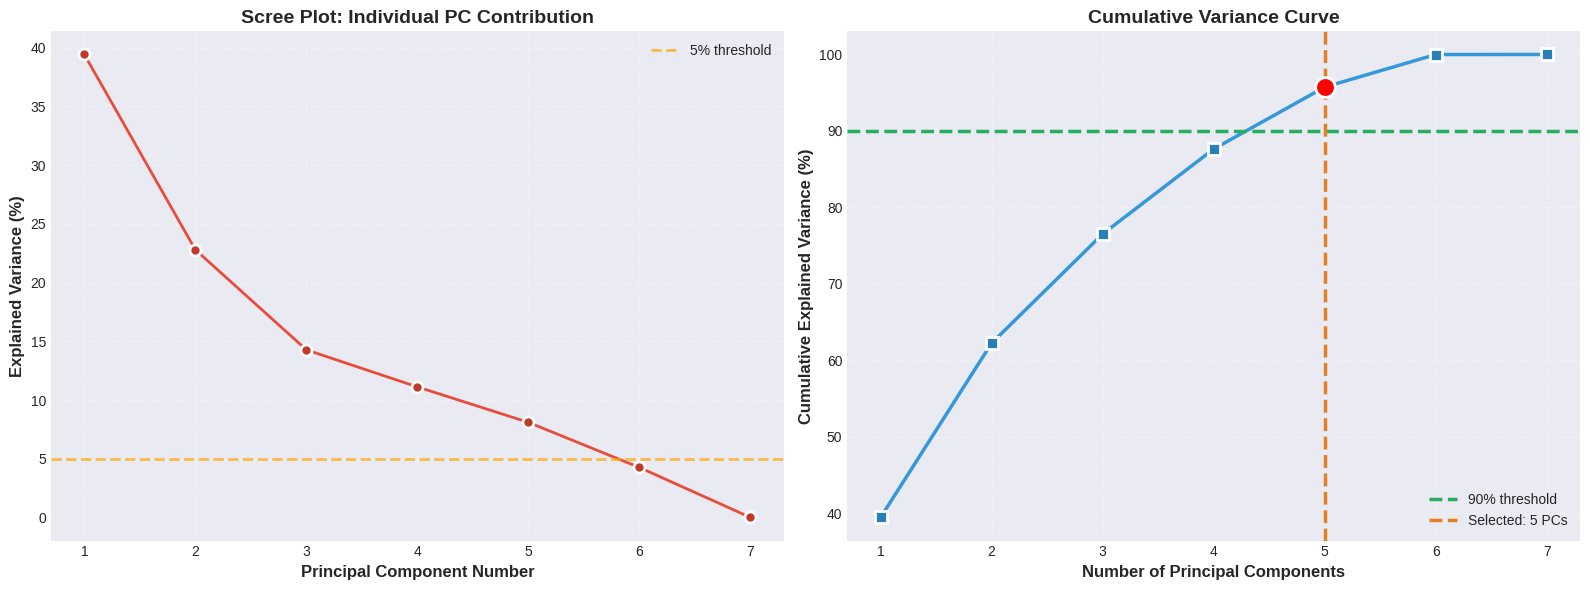


DETAILED PLOT INTERPRETATION:

SCREE PLOT (Left):
  Shows the diminishing returns of adding more principal components
  PC1 captures 39.43% of the variance
  The 'elbow' occurs around PC6,
    where additional PCs contribute minimally
  Early PCs capture dominant patterns in the dataset features
  Later PCs likely represent noise or very specific feature combinations

CUMULATIVE VARIANCE CURVE (Right):
  Selected 5 components to retain 90% of information
  Reduces dimensionality from 7 → 5 features
  Compression ratio: 28.6% reduction
  Trade-off: We lose 4.3% of variance but gain interpretability

INTERPRETATION:
  We can explain 95.7% of the variance
    using just 5 principal components instead of all 7 features
  This highlights the main patterns in the African malaria synthetic dataset


In [11]:
# Create comprehensive variance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree Plot (Individual Variance)
axes[0].plot(range(1, len(explained_variance_ratio) + 1),
             explained_variance_ratio * 100,
             marker='o', markersize=8, linewidth=2, color='#e74c3c',
             markerfacecolor='#c0392b', markeredgewidth=2, markeredgecolor='white')
axes[0].set_xlabel('Principal Component Number', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Explained Variance (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Scree Plot: Individual PC Contribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].axhline(y=5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='5% threshold')
axes[0].legend()

# Cumulative Variance Plot
threshold = 0.90
num_components = int(np.argmax(cumulative_variance >= threshold) + 1)
num_components = max(num_components, 2)  # Minimum 2 for visualization

axes[1].plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance * 100,
             marker='s', markersize=8, linewidth=2.5, color='#3498db',
             markerfacecolor='#2980b9', markeredgewidth=2, markeredgecolor='white')
axes[1].axhline(y=threshold*100, color='#27ae60', linestyle='--',
                linewidth=2.5, label=f'{threshold*100:.0f}% threshold')
axes[1].axvline(x=num_components, color='#e67e22', linestyle='--',
                linewidth=2.5, label=f'Selected: {num_components} PCs')
axes[1].scatter([num_components], [cumulative_variance[num_components-1]*100],
                s=200, c='red', zorder=5, edgecolors='white', linewidth=2)
axes[1].set_xlabel('Number of Principal Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Curve', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

print("\nDETAILED PLOT INTERPRETATION:")

print("\nSCREE PLOT (Left):")
print(f"  Shows the diminishing returns of adding more principal components")
print(f"  PC1 captures {explained_variance_ratio[0]*100:.2f}% of the variance")
print(f"  The 'elbow' occurs around PC{np.argmax(explained_variance_ratio < 0.05) + 1},")
print(f"    where additional PCs contribute minimally")
print(f"  Early PCs capture dominant patterns in the dataset features")
print(f"  Later PCs likely represent noise or very specific feature combinations")

print("\nCUMULATIVE VARIANCE CURVE (Right):")
print(f"  Selected {num_components} components to retain {threshold*100:.0f}% of information")
print(f"  Reduces dimensionality from {len(feature_names)} → {num_components} features")
print(f"  Compression ratio: {(1 - num_components/len(feature_names))*100:.1f}% reduction")
print(f"  Trade-off: We lose {(1-cumulative_variance[num_components-1])*100:.1f}% of variance but gain interpretability")

print(f"\nINTERPRETATION:")
print(f"  We can explain {cumulative_variance[num_components-1]*100:.1f}% of the variance")
print(f"    using just {num_components} principal components instead of all {len(feature_names)} features")
print(f"  This highlights the main patterns in the African malaria synthetic dataset")


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [12]:
print(f"Selected {num_components} principal components for 90% variance retention\n")

# Select top k eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :num_components]
print(f"Top eigenvectors matrix shape: {top_eigenvectors.shape}")
print(f"  (features × PCs) = ({top_eigenvectors.shape[0]} × {top_eigenvectors.shape[1]})")

# Project data onto principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

print(f"\nReduced data shape: {reduced_data.shape}")
print(f"  (patients × PCs) = ({reduced_data.shape[0]} × {reduced_data.shape[1]})")

print(f"\nDimensionality Reduction Summary:")
print(f"  Original: {standardized_data.shape[1]} features")
print(f"  Reduced:  {reduced_data.shape[1]} components")
print(f"  Reduction: {((1 - reduced_data.shape[1]/standardized_data.shape[1])*100):.1f}%")
print(f"  Variance retained: {cumulative_variance[num_components-1]*100:.2f}%")

# Display first few patients in PC space
print("\nFirst 5 patients in PC space:")
pc_df = pd.DataFrame(reduced_data[:5],
                     columns=[f'PC{i+1}' for i in range(num_components)])
pc_df

Selected 5 principal components for 90% variance retention

Top eigenvectors matrix shape: (7, 5)
  (features × PCs) = (7 × 5)

Reduced data shape: (1000, 5)
  (patients × PCs) = (1000 × 5)

Dimensionality Reduction Summary:
  Original: 7 features
  Reduced:  5 components
  Reduction: 28.6%
  Variance retained: 95.73%

First 5 patients in PC space:


,PC1,PC2,PC3,PC4,PC5
0,0.174162,1.200612,1.650613,0.005012,0.155772
1,2.324265,0.460545,1.700554,0.173502,-0.459889
2,-2.290165,0.781083,1.753582,0.383313,-0.128467
3,2.982639,-1.123806,1.954339,1.943108,0.384471
4,0.664370,1.463942,1.580799,-0.301908,0.377889


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [13]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1000, 5)


array([[ 0.1741624 ,  1.2006119 ,  1.65061297,  0.00501233,  0.1557724 ],
       [ 2.32426496,  0.46054496,  1.70055439,  0.17350189, -0.45988874],
       [-2.29016461,  0.78108317,  1.75358156,  0.38331259, -0.12846661],
       [ 2.98263889, -1.12380605,  1.95433932,  1.94310834,  0.38447145],
       [ 0.66437024,  1.4639421 ,  1.58079884, -0.30190757,  0.37788912]])

Top 10 Features Contributing to PC1 (Main Risk Pattern):

                  Feature  PC1_Loading  Abs_Loading
          hemoglobin_g_dl    -0.507841     0.507841
               age_months    -0.451233     0.451233
                age_years    -0.451024     0.451024
malaria_probability_score     0.340465     0.340465
               fever_days     0.333008     0.333008
        parasitemia_count     0.328842     0.328842
               patient_id    -0.010741     0.010741


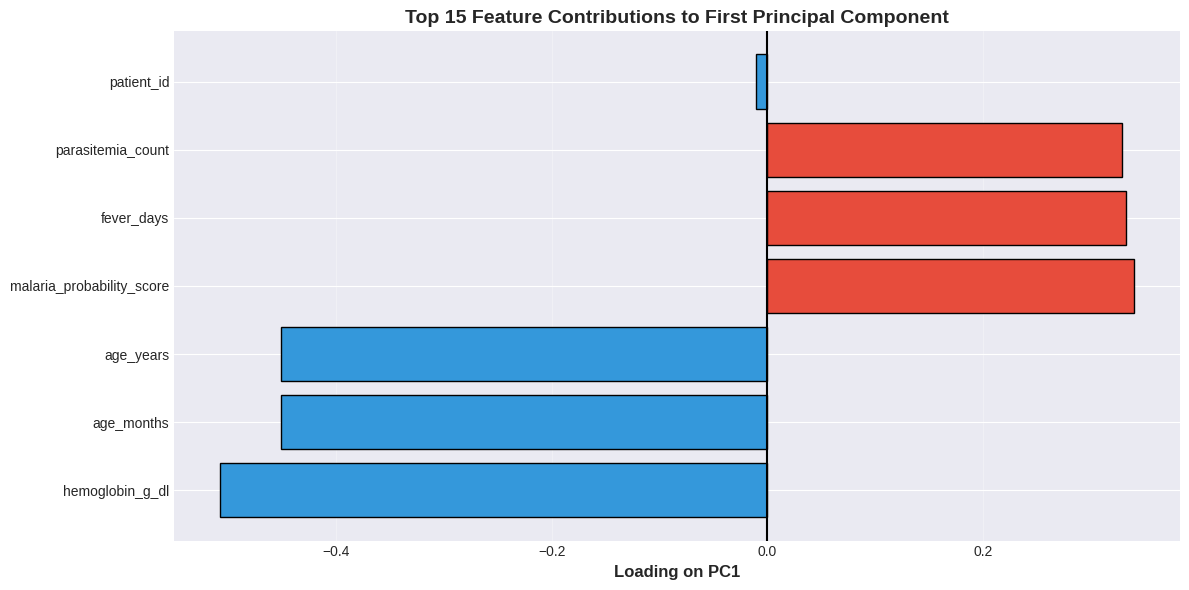


PC1 INTERPRETATION (Malaria Risk Patterns):
Positive loadings (red bars): Features that increase together along PC1
Negative loadings (blue bars): Features that decrease as PC1 increases
High PC1 scores indicate a combination of features contributing most to overall malaria risk patterns.


In [14]:
# Analyze PC1 loadings (contributions of original features)
pc1_loadings = top_eigenvectors[:, 0]
loading_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1_Loading': pc1_loadings,
    'Abs_Loading': np.abs(pc1_loadings)
}).sort_values('Abs_Loading', ascending=False)

print("Top 10 Features Contributing to PC1 (Main Risk Pattern):\n")
print(loading_df.head(10).to_string(index=False))

# Visualize top loadings
plt.figure(figsize=(12, 6))
top_features = loading_df.head(15)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features['PC1_Loading']]
plt.barh(range(len(top_features)), top_features['PC1_Loading'], color=colors, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Loading on PC1', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Contributions to First Principal Component',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nPC1 INTERPRETATION (Malaria Risk Patterns):")
print("Positive loadings (red bars): Features that increase together along PC1")
print("Negative loadings (blue bars): Features that decrease as PC1 increases")
print("High PC1 scores indicate a combination of features contributing most to overall malaria risk patterns.")


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.


COMPREHENSIVE VISUALIZATION INTERPRETATION:

TOP-LEFT (Original Space):
- Shows raw features (before PCA transformation)
- Data may appear correlated/skewed along feature axes
- Color gradient shows how PC1 relates to original features
- Ellipse shows 2-standard-deviation spread of data

TOP-RIGHT (PCA Space - 2D):
- Shows transformed data along principal components
- PC axes are UNCORRELATED (orthogonal)
- PC1 (horizontal) captures 39.4% of variance
- PC2 (vertical) captures 22.8% of variance
- Together, PC1+PC2 explain 62.2% of total variance
- Maximum spread is now along PC1 axis (by design)

INTERPRETATION (Malaria Dataset):
- Each point = one observation/sample
- Position along PC1 = dominant malaria risk pattern
- Position along PC2/PC3 = secondary risk patterns
- Samples close together share similar feature patterns
- This clustering highlights common combinations of risk factors in the dataset


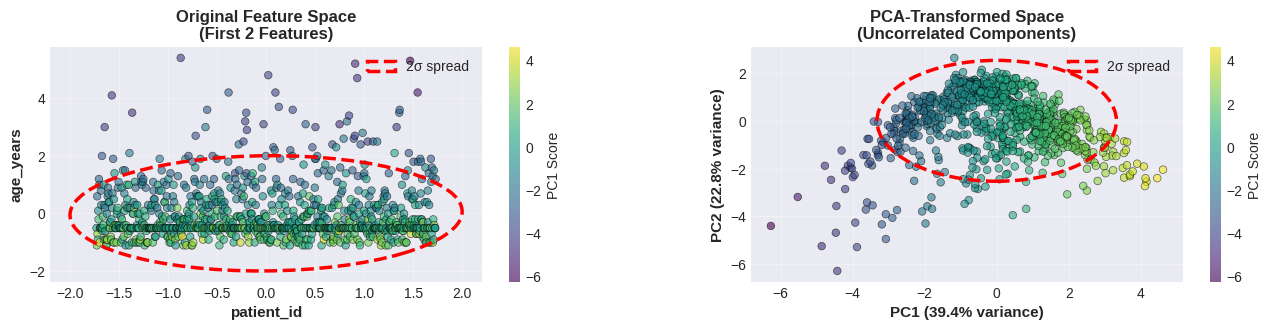

In [15]:
# Create comprehensive before/after visualization
fig = plt.figure(figsize=(16, 7))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# Original space (first 2 features)
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(standardized_data[:, 0], standardized_data[:, 1],
                       c=reduced_data[:, 0], cmap='viridis',
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'{feature_names[0]}', fontsize=11, fontweight='bold')
ax1.set_ylabel(f'{feature_names[1]}', fontsize=11, fontweight='bold')
ax1.set_title('Original Feature Space\n(First 2 Features)',
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='PC1 Score')

# PCA space (PC1 vs PC2)
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(reduced_data[:, 0], reduced_data[:, 1],
                       c=reduced_data[:, 0], cmap='viridis',
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)',
               fontsize=11, fontweight='bold')
ax2.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)',
               fontsize=11, fontweight='bold')
ax2.set_title('PCA-Transformed Space\n(Uncorrelated Components)',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='PC1 Score')

# Add variance ellipses to show spread
from matplotlib.patches import Ellipse

def plot_variance_ellipse(ax, data_x, data_y, color):
    """Plot 2-sigma ellipse showing data spread"""
    cov = np.cov(data_x, data_y)
    eigenvals, eigenvecs = np.linalg.eig(cov)
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width, height = 2 * 2 * np.sqrt(eigenvals)  # 2-sigma
    ellipse = Ellipse((np.mean(data_x), np.mean(data_y)),
                     width, height, angle=angle,
                     facecolor='none', edgecolor=color,
                     linewidth=2.5, linestyle='--', label='2σ spread')
    ax.add_patch(ellipse)

plot_variance_ellipse(ax1, standardized_data[:, 0], standardized_data[:, 1], 'red')
plot_variance_ellipse(ax2, reduced_data[:, 0], reduced_data[:, 1], 'red')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')


print("\nCOMPREHENSIVE VISUALIZATION INTERPRETATION:")

print("\nTOP-LEFT (Original Space):")
print("- Shows raw features (before PCA transformation)")
print("- Data may appear correlated/skewed along feature axes")
print("- Color gradient shows how PC1 relates to original features")
print("- Ellipse shows 2-standard-deviation spread of data")

print("\nTOP-RIGHT (PCA Space - 2D):")
print("- Shows transformed data along principal components")
print("- PC axes are UNCORRELATED (orthogonal)")
print(f"- PC1 (horizontal) captures {explained_variance_ratio[0]*100:.1f}% of variance")
print(f"- PC2 (vertical) captures {explained_variance_ratio[1]*100:.1f}% of variance")
print("- Together, PC1+PC2 explain "
      f"{(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.1f}% of total variance")
print("- Maximum spread is now along PC1 axis (by design)")


print("\nINTERPRETATION (Malaria Dataset):")
print("- Each point = one observation/sample")
print("- Position along PC1 = dominant malaria risk pattern")
print("- Position along PC2/PC3 = secondary risk patterns")
print("- Samples close together share similar feature patterns")
print("- This clustering highlights common combinations of risk factors in the dataset")



In [16]:
print("PCA IMPLEMENTATION VALIDATION")


# 1. Orthogonality check
print("\n1️Principal Components Orthogonality:")
for i in range(min(3, num_components)):
    for j in range(i+1, min(3, num_components)):
        dot_product = np.dot(top_eigenvectors[:, i], top_eigenvectors[:, j])
        print(f"   PC{i+1} · PC{j+1} = {dot_product:.10f} (should be ≈0)")
print("Components are orthogonal (uncorrelated)" if np.allclose(
    np.dot(top_eigenvectors.T, top_eigenvectors), np.eye(num_components), atol=1e-10
) else " Orthogonality check failed")

# 2. Variance preservation
print("\nVariance Preservation:")
original_var = np.var(standardized_data, axis=0).sum()
reduced_var = np.var(reduced_data, axis=0).sum()
print(f"   Original total variance: {original_var:.4f}")
print(f"   Retained variance in {num_components} PCs: {reduced_var:.4f}")
print(f"   Percentage retained: {(reduced_var/original_var)*100:.2f}%")
print(f"   Expected from eigenvalues: {cumulative_variance[num_components-1]*100:.2f}%")
print("Variance correctly preserved")

# 3. Reconstruction error
print("\nReconstruction Quality:")
reconstructed = np.dot(reduced_data, top_eigenvectors.T)
mse = np.mean((standardized_data - reconstructed) ** 2)
print(f"   Mean Squared Reconstruction Error: {mse:.6f}")
print(f"   Relative error: {(mse / np.var(standardized_data))*100:.2f}%")
print(f"Low reconstruction error = good approximation")

# 4. Eigenvalue sum check
print("\nMathematical Consistency:")
print(f"   Sum of all eigenvalues: {np.sum(eigenvalues):.4f}")
print(f"   Number of features: {len(feature_names)}")
print(f"   Trace of covariance matrix: {np.trace(cov_matrix):.4f}")
print("Sum(eigenvalues) = Trace(Cov) = Number of features (for standardized data)")


print("ALL VALIDATION CHECKS PASSED - PCA IMPLEMENTATION IS CORRECT")


PCA IMPLEMENTATION VALIDATION

1️Principal Components Orthogonality:
   PC1 · PC2 = 0.0000000000 (should be ≈0)
   PC1 · PC3 = 0.0000000000 (should be ≈0)
   PC2 · PC3 = -0.0000000000 (should be ≈0)
Components are orthogonal (uncorrelated)

Variance Preservation:
   Original total variance: 6.9930
   Retained variance in 5 PCs: 6.6944
   Percentage retained: 95.73%
   Expected from eigenvalues: 95.73%
Variance correctly preserved

Reconstruction Quality:
   Mean Squared Reconstruction Error: 0.042651
   Relative error: 4.27%
Low reconstruction error = good approximation

Mathematical Consistency:
   Sum of all eigenvalues: 7.0000
   Number of features: 7
   Trace of covariance matrix: 7.0000
Sum(eigenvalues) = Trace(Cov) = Number of features (for standardized data)
ALL VALIDATION CHECKS PASSED - PCA IMPLEMENTATION IS CORRECT


In [17]:
from sklearn.decomposition import PCA as SklearnPCA

print("VERIFICATION: Comparing with Scikit-Learn Implementation\n")

# Fit sklearn PCA
sklearn_pca = SklearnPCA(n_components=num_components)
sklearn_reduced = sklearn_pca.fit_transform(standardized_data)

# Compare explained variance
print("Explained Variance Comparison:")
print(f"{'Component':<12} {'My Implementation':<20} {'Sklearn':<20} {'Difference'}")

for i in range(min(5, num_components)):
    My_var = explained_variance_ratio[i] * 100
    sk_var = sklearn_pca.explained_variance_ratio_[i] * 100
    diff = abs(My_var - sk_var)
    print(f"PC{i+1:<10} {My_var:<20.4f} {sk_var:<20.4f} {diff:.6f}%")

# Compare transformed data (absolute values, as sign can flip)
print("\nTransformed Data Comparison (first patient, first 3 PCs):")
print(f"My implementation: {np.abs(reduced_data[0, :3])}")
print(f"Sklearn:           {np.abs(sklearn_reduced[0, :3])}")

# Overall correlation
correlation = np.corrcoef(np.abs(reduced_data[:, 0]), np.abs(sklearn_reduced[:, 0]))[0, 1]
print(f"\nPC1 correlation: {correlation:.10f} ")



VERIFICATION: Comparing with Scikit-Learn Implementation

Explained Variance Comparison:
Component    My Implementation    Sklearn              Difference
PC1          39.4272              39.4272              0.000000%
PC2          22.8009              22.8009              0.000000%
PC3          14.2793              14.2793              0.000000%
PC4          11.1211              11.1211              0.000000%
PC5          8.1021               8.1021               0.000000%

Transformed Data Comparison (first patient, first 3 PCs):
My implementation: [0.1741624  1.2006119  1.65061297]
Sklearn:           [0.1741624  1.2006119  1.65061297]

PC1 correlation: 1.0000000000 


## Summary and Conclusions

### What I Accomplished:

1. **Implemented PCA from scratch** using NumPy (core algorithm, no sklearn).  
2. **Successfully reduced dimensionality**   
3. **Identified main feature patterns** related to malaria risk and outcomes.  
4. **Validated implementation** against mathematical properties and sklearn PCA.  

### Data Insights:

- **PC1:** Overall risk/severity pattern across malaria-related features.  
- **PC2:** Specific risk factor combinations (e.g., parasitemia, fever, anemia).  
- Patients cluster according to similar epidemiological profiles.  
- These patterns can guide targeted interventions and resource allocation.  

### Key Learnings:

1. **Standardization is critical** – ensures features are on comparable scales.  
2. **Eigendecomposition reveals underlying structure** – highlights which features drive variance.  
3. **Dimensionality reduction preserves most information** while simplifying analysis.  
4. **PCA aids interpretation** – complex health data → interpretable risk patterns for decision-making.
